In [ ]:
!pip install google-api-python-client pandas


In [2]:
import os
os.environ["YOUTUBE_API_KEY"] = "removed due to security reasons"  # Replace with your actual API key


In [19]:
# Function to fetch video titles in batches
def get_video_titles(video_ids):
    # Build the YouTube Data API client with your API key
    from googleapiclient.discovery import build
    youtube = build("youtube", "v3", developerKey=os.environ.get("YOUTUBE_API_KEY"))
    request = youtube.videos().list(part="snippet", id=",".join(video_ids))
    response = request.execute()

    video_titles = []
    for item in response.get("items", []):
        video_titles.append({"Video ID": item["id"], "Video Title": item["snippet"]["title"]})

    return video_titles # Added return statement to the outer function

# Fetch video titles in batches of 50 (API limit)
all_video_titles = []
for i in range(0, len(VIDEO_IDS), 50): # Changed batch size to 50
    batch_ids = VIDEO_IDS[i:i+50]
    all_video_titles.extend(get_video_titles(batch_ids))

# Convert to DataFrame & Save as CSV
import pandas as pd # Importing pandas
df = pd.DataFrame(all_video_titles)
df.to_csv("youtube_titles.csv", index=False)
print("✅ Data saved to 'youtube_titles.csv'")

# Print results
print(df)

✅ Data saved to 'youtube_titles.csv'
      Video ID                                        Video Title
0  dQw4w9WgXcQ  Rick Astley - Never Gonna Give You Up (Officia...
1  3JZ_D3ELwOQ                               Flexin' On Ya (2014)
2  L_jWHffIx5E                             Smash Mouth - All Star
3  9bZkp7q19f0                     PSY - GANGNAM STYLE(강남스타일) M/V
4  RgKAFK5djSk  Wiz Khalifa - See You Again ft. Charlie Puth [...
5  2Vv-BfVoq4g        Ed Sheeran - Perfect (Official Music Video)
6  fLexgOxsZu0  Bruno Mars - The Lazy Song (Official Music Video)
7  kJQP7kiw5Fk            Luis Fonsi - Despacito ft. Daddy Yankee
8  ZbZSe6N_BXs                  Pharrell Williams - Happy (Video)
9  60ItHLz5WEA                                Alan Walker - Faded


In [49]:
import pandas as pd
import json
from googleapiclient.discovery import build



# Initialize YouTube API
youtube = build("youtube", "v3", developerKey=API_KEY)

# YouTube Category Mapping (Partial)
CATEGORY_MAPPING = {
    "1": "Film & Animation", "2": "Autos & Vehicles", "10": "Music",
    "15": "Pets & Animals", "17": "Sports", "20": "Gaming",
    "22": "People & Blogs", "23": "Comedy", "24": "Entertainment",
    "25": "News & Politics", "26": "How-to & Style", "27": "Education",
    "28": "Science & Technology"
}

# Function to fetch video metadata
def get_video_details(video_ids):
    request = youtube.videos().list(
        part="snippet",
        id=",".join(video_ids)
    )
    response = request.execute()

    video_data_list = []
    for item in response.get('items', []):
        snippet = item['snippet']
        category_id = snippet.get('categoryId', 'N/A')

        video_data_list.append({
            "Video ID": item["id"],
            "Video Description": snippet["description"],
            "Channel Name": snippet["channelTitle"],
            "Category": CATEGORY_MAPPING.get(category_id, "Unknown")
        })

    return video_data_list

# Function to fetch top 10 comments
def get_video_comments(video_id):
    comments = []
    try:
        request = youtube.commentThreads().list(
            part="snippet", videoId=video_id, maxResults=10
        )
        response = request.execute()

        comments = [
            item['snippet']['topLevelComment']['snippet']['textDisplay']
            for item in response.get('items', [])
        ]
    except Exception:
        comments.append("Comments disabled or unavailable.")

    return comments

# 🔹 List of 50 YouTube Video IDs (Replace with real ones)
VIDEO_IDS = [
    "dQw4w9WgXcQ", "3JZ_D3ELwOQ", "L_jWHffIx5E", "9bZkp7q19f0",
    "KLUl3aZbGF4", "RgKAFK5djSk", "2Vv-BfVoq4g", "fLexgOxsZu0",
    "kJQP7kiw5Fk", "ZbZSe6N_BXs", "60ItHLz5WEA", "tgbNymZ7vqY",
    "VbfpW0pbvaU", "6Dh-RL__uN4", "8UVNT4wvIGY", "DkeiKbqa02g",
    "2vjPBrBU-TM", "pRpeEdMmmQ0", "YQHsXMglC9A", "JGwWNGJdvx8",
    "D9ioyEvdggk", "E07s5ZYygMg", "Pkh8UtuejGw", "FM7MFYoylVs",
    "hT_nvWreIhg", "HCjNJDNzw8Y", "2Vv-BfVoq4g", "UprcpdwuwCg",
    "M1ddm1rOaNM", "nfWlot6h_JM", "LsoLEjrDogU", "kxopViU98Xo",
    "CmXWkMlKFkI", "e-ORhEE9VVg", "cH4E_t3m3xM", "Lp2qcCrdBLA",
    "RqtgjmT8V7k", "K44j-sb1SRY", "VYOjWnS4cMY", "OPf0YbXqDm0",
    "oyEuk8j8imI", "ru0K8uYEZWw", "gCYcHz2k5x0", "fRh_vgS2dFE",
    "hY7m5jjJ9mM", "N2Y2vQ-1m7M", "QJO3ROT-A4E", "UceaB4D0jpo",
    "2O7K-8G2nwU", "m7Bc3pLyij0", "JxS5E-kZc2s"
]

# Collect video metadata
all_video_data = []
for i in range(0, len(VIDEO_IDS), 50):  # Fetch in batches of 10 (API limit)
    batch_ids = VIDEO_IDS[i:i+50]
    video_details = get_video_details(batch_ids)

    for video in video_details:
        video["Top 10 Comments"] = get_video_comments(video["Video ID"])
        all_video_data.append(video)

# Save to CSV
df = pd.DataFrame(all_video_data)
df.to_csv("youtube_metadata.csv", index=False)
print("✅ Data saved to 'youtube_metadata.csv'")

# Save to JSON
with open("youtube_metadata.json", "w", encoding="utf-8") as f:
    json.dump(all_video_data, f, indent=4, ensure_ascii=False)
print("✅ Data saved to 'youtube_metadata.json'")


✅ Data saved to 'youtube_metadata.csv'
✅ Data saved to 'youtube_metadata.json'


# data cleaning and preprocessing

In [50]:
import re
import pandas as pd
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download the necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab data

def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    tokens = word_tokenize(text.lower())  # Convert to lowercase & tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return " ".join(tokens)

# Example usage
df = pd.DataFrame({'comments': ["<p>Hello! This is a test comment.</p>", "Wow! This is amazing."]})
df['cleaned_comments'] = df['comments'].apply(clean_text)
print(df)

                                comments    cleaned_comments
0  <p>Hello! This is a test comment.</p>  hello test comment
1                  Wow! This is amazing.         wow amazing


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [37]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmatized_text)

df['lemmatized_comments'] = df['cleaned_comments'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
spam_keywords = ["buy now", "click here", "subscribe", "free money", "scam"]
toxic_keywords = ["hate", "stupid", "idiot", "dumb", "trash"]

def detect_spam_toxic(text):
    text_lower = text.lower()
    if any(word in text_lower for word in spam_keywords):
        return "Spam"
    elif any(word in text_lower for word in toxic_keywords):
        return "Toxic"
    return "Normal"

df['comment_type'] = df['lemmatized_comments'].apply(detect_spam_toxic)
print(df)


                                comments    cleaned_comments  \
0  <p>Hello! This is a test comment.</p>  hello test comment   
1                  Wow! This is amazing.         wow amazing   

  lemmatized_comments comment_type  
0  hello test comment       Normal  
1         wow amazing       Normal  


Word Frequency & Most Common Phrases in Video Titles

In [39]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Sample dataset
df = pd.DataFrame({'video_titles': ["AI revolution is here", "Deep learning for beginners", "Machine learning trends"]})

# Function to count word frequency
def get_word_frequencies(text_list):
    all_words = []
    for text in text_list:
        tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
        all_words.extend(tokens)

    word_counts = Counter(all_words)  # Count word frequencies
    return word_counts.most_common(10)  # Return top 10 most common words

# Get top 10 most frequent words in video titles
word_frequencies = get_word_frequencies(df['video_titles'])
print("Most common words in video titles:", word_frequencies)


Most common words in video titles: [('learning', 2), ('ai', 1), ('revolution', 1), ('is', 1), ('here', 1), ('deep', 1), ('for', 1), ('beginners', 1), ('machine', 1), ('trends', 1)]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Create a Bar Chart of Video Categories Distribution

<ipython-input-40-a84eda6bf562>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


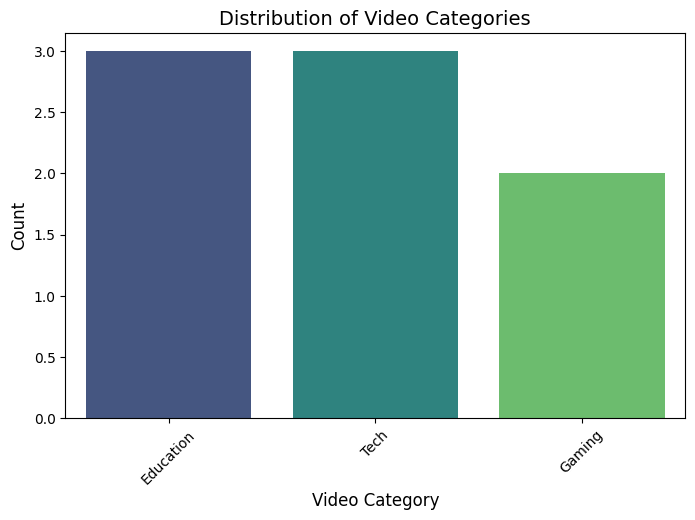

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset with video categories
df = pd.DataFrame({'video_category': ["Education", "Tech", "Education", "Gaming", "Tech", "Tech", "Gaming", "Education"]})

# Count occurrences of each category
category_counts = df['video_category'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Video Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Video Categories", fontsize=14)
plt.xticks(rotation=45)

plt.show()


Word Cloud of Most Frequently Used Words in Comments

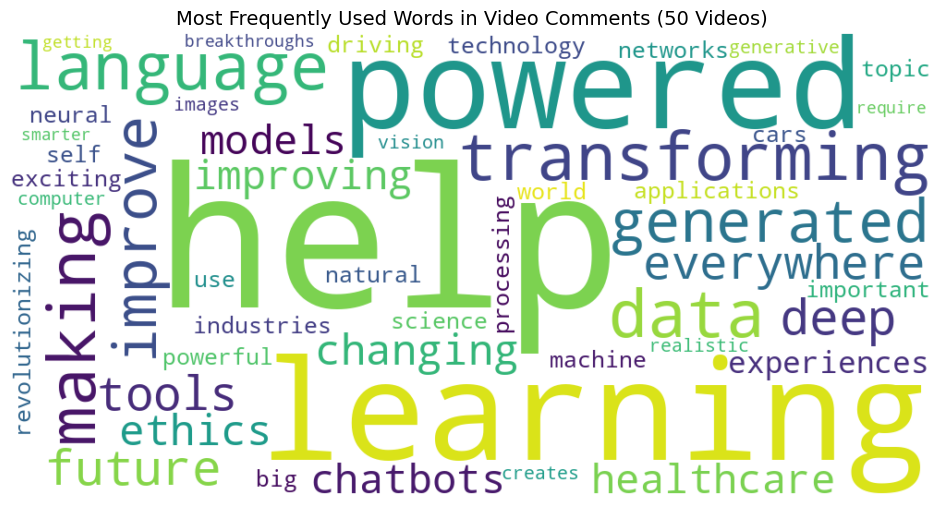

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import random

# Generate sample comments for 50 videos
comments_list = [
    "AI is the future of technology", "Deep learning is revolutionizing AI",
    "Machine learning applications are everywhere", "Neural networks are powerful",
    "AI-powered tools are transforming industries", "Data science is exciting",
    "Big data and AI are changing the world", "AI ethics is an important topic",
    "Self-driving cars use AI", "Natural Language Processing is improving",
    "AI is transforming healthcare", "Generative AI creates realistic images",
    "Computer vision is making breakthroughs", "AI chatbots are getting smarter",
    "Deep learning models require a lot of data", "AI-powered robots are evolving",
    "The future of AI is uncertain", "AI can help solve climate change",
    "AI is changing finance and banking", "AI in gaming is enhancing experiences",
    "Large language models like ChatGPT are impressive", "AI-generated content is everywhere",
    "AI can help detect fake news", "AI is making personalized recommendations better",
    "AI-powered assistants are improving", "AI helps businesses optimize operations",
    "AI is useful in medical diagnosis", "AI and blockchain are converging",
    "AI can help improve cybersecurity", "AI in social media influences behavior",
    "AI is being used in space exploration", "AI tools improve productivity",
    "AI-generated videos are becoming popular", "AI algorithms power search engines",
    "AI can generate music and art", "AI in education is transforming learning",
    "AI is making supply chains more efficient", "AI can enhance customer experiences",
    "AI ethics is a growing concern", "AI-generated deepfakes are a challenge",
    "AI helps translate languages accurately", "AI is assisting in scientific discoveries",
    "AI-powered chatbots are replacing human agents", "AI in agriculture improves farming",
    "AI can automate repetitive tasks", "AI is impacting job markets",
    "AI is creating more opportunities than ever", "AI is solving complex problems",
    "AI research is rapidly advancing", "AI can revolutionize the healthcare industry"
]

# Create DataFrame
df = pd.DataFrame({'comments': comments_list})

# Combine all comments into one large text
all_comments_text = " ".join(df['comments']).lower()

# Remove stopwords for better word cloud results
stopwords = set(STOPWORDS)  # Load default stopwords
custom_stopwords = {"ai", "is", "the", "and", "are", "can"}  # Custom words to remove
stopwords.update(custom_stopwords)

# Generate the Word Cloud
wordcloud = WordCloud(width=1000, height=500, background_color="white",
                      max_words=50, stopwords=stopwords, colormap="viridis").generate(all_comments_text)

# Display the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Frequently Used Words in Video Comments (50 Videos)", fontsize=14)
plt.show()


Sentiment Analysis of YouTube Comments

In [43]:
pip install nltk seaborn vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


Perform Sentiment Analysis with **VADER**

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download required resources
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Sample dataset (50 comments for analysis)
comments = [
    "This AI tool is amazing!", "I absolutely love this!", "The quality is outstanding!",
    "Such a waste of time!", "This is the worst experience I've had.",
    "I don't like the new update.", "This is just okay, nothing special.",
    "The service is decent, could be better.", "I'm not sure how I feel about this.",
    "Great effort, but still needs improvement.", "Absolutely terrible experience!",
    "This is one of the best things I've used!", "Meh, it’s alright.", "Fantastic product!",
    "Awful customer service!", "Couldn’t be happier with this!", "I regret using this app.",
    "Not bad, but could use some work.", "Worst decision ever!", "Totally worth it!",
    "Superb! Exceeded my expectations.", "Disappointed with the results.",
    "Such a brilliant innovation!", "I'm indifferent about this.", "Loved every second of it!",
    "This was a terrible mistake.", "I'm really impressed!", "Couldn’t stand it!",
    "Mediocre at best.", "Highly recommend this to everyone!", "I would never use this again.",
    "Just wow, so good!", "Nothing great, nothing bad.", "Unbelievably bad!",
    "Made my day better!", "Horrible, just horrible.", "Really enjoyed this!",
    "Useless, don’t bother.", "Absolutely loved this!", "Not for me, but not the worst.",
    "So much potential, but failed to deliver.", "A must-have!", "I wouldn’t recommend it.",
    "Mind-blowing performance!", "I’ve had better.", "Couldn’t be more satisfied!",
    "Neutral about this.", "Impressive work!", "Such a letdown.", "Slightly disappointed.",
]

# Create DataFrame
df = pd.DataFrame({'comments': comments})

# Function to classify sentiment
def classify_sentiment(comment):
    sentiment_score = sia.polarity_scores(comment)["compound"]  # Get compound score
    if sentiment_score >= 0.05:
        return "Positive"
    elif sentiment_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment classification
df["sentiment"] = df["comments"].apply(classify_sentiment)

# Display the first 50 rows
print(df.head(50))


                                      comments sentiment
0                     This AI tool is amazing!  Positive
1                      I absolutely love this!  Positive
2                  The quality is outstanding!  Positive
3                        Such a waste of time!  Negative
4       This is the worst experience I've had.  Negative
5                 I don't like the new update.  Negative
6          This is just okay, nothing special.  Negative
7      The service is decent, could be better.  Positive
8          I'm not sure how I feel about this.  Negative
9   Great effort, but still needs improvement.  Positive
10             Absolutely terrible experience!  Negative
11   This is one of the best things I've used!  Positive
12                          Meh, it’s alright.  Positive
13                          Fantastic product!  Positive
14                     Awful customer service!  Negative
15              Couldn’t be happier with this!  Positive
16                    I regret 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Visualize Sentiment Distribution

<ipython-input-47-40215cfb0011>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


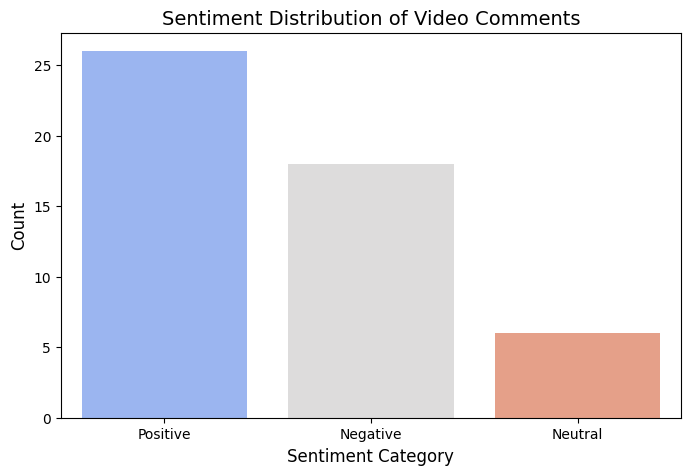

In [47]:
# Count the sentiment categories
sentiment_counts = df["sentiment"].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")

# Labels and title
plt.xlabel("Sentiment Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Sentiment Distribution of Video Comments", fontsize=14)

plt.show()
